In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
import os
from datetime import datetime

import warnings





df = pd.read_csv(r"C:\Users\Adimin\Downloads\archive\TSLA.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [6]:
df.shape

(2416, 7)

In [7]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06
50%,213.035004,216.745002,208.870002,212.960007,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.2+ KB


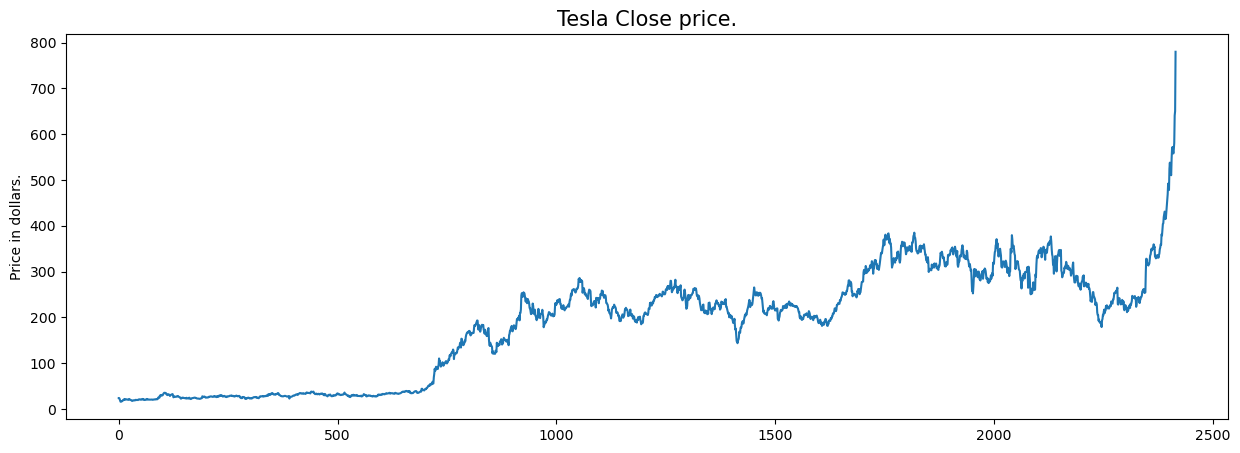

In [9]:
plt.figure(figsize=(15,5))
plt.plot(df['Close'])
plt.title('Tesla Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()

In [10]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [11]:
df[df['Close'] == df['Adj Close']].shape

(2416, 7)

In [12]:
df = df.drop(['Adj Close'], axis=1)
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

C:\Users\Adimin\AppData\Local\Temp\ipykernel_13264\1769543562.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 3, i + 1)
C:\Users\Adimin\AppData\Local\Temp\ipykernel_13264\1769543562.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
C:\Users\Adimin\AppData\Local\Temp\ipykernel_13264\1769543562.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) 

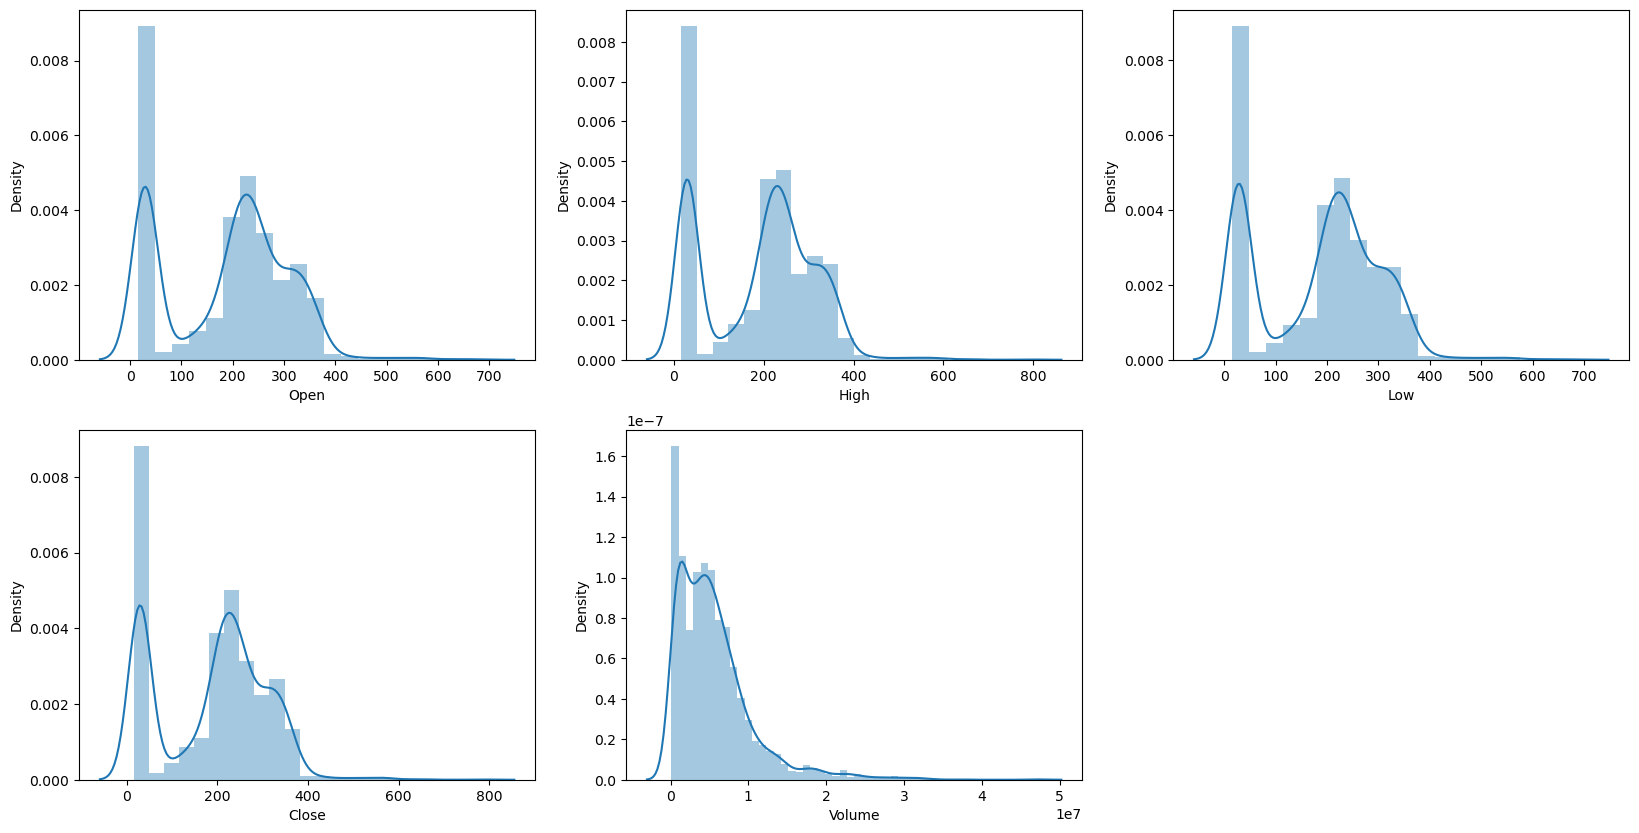

In [13]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']

plt.subplots(figsize=(20, 10))

for i, col in enumerate(features):
    plt.subplot(2, 3, i + 1)
    sns.distplot(df[col])

plt.show()

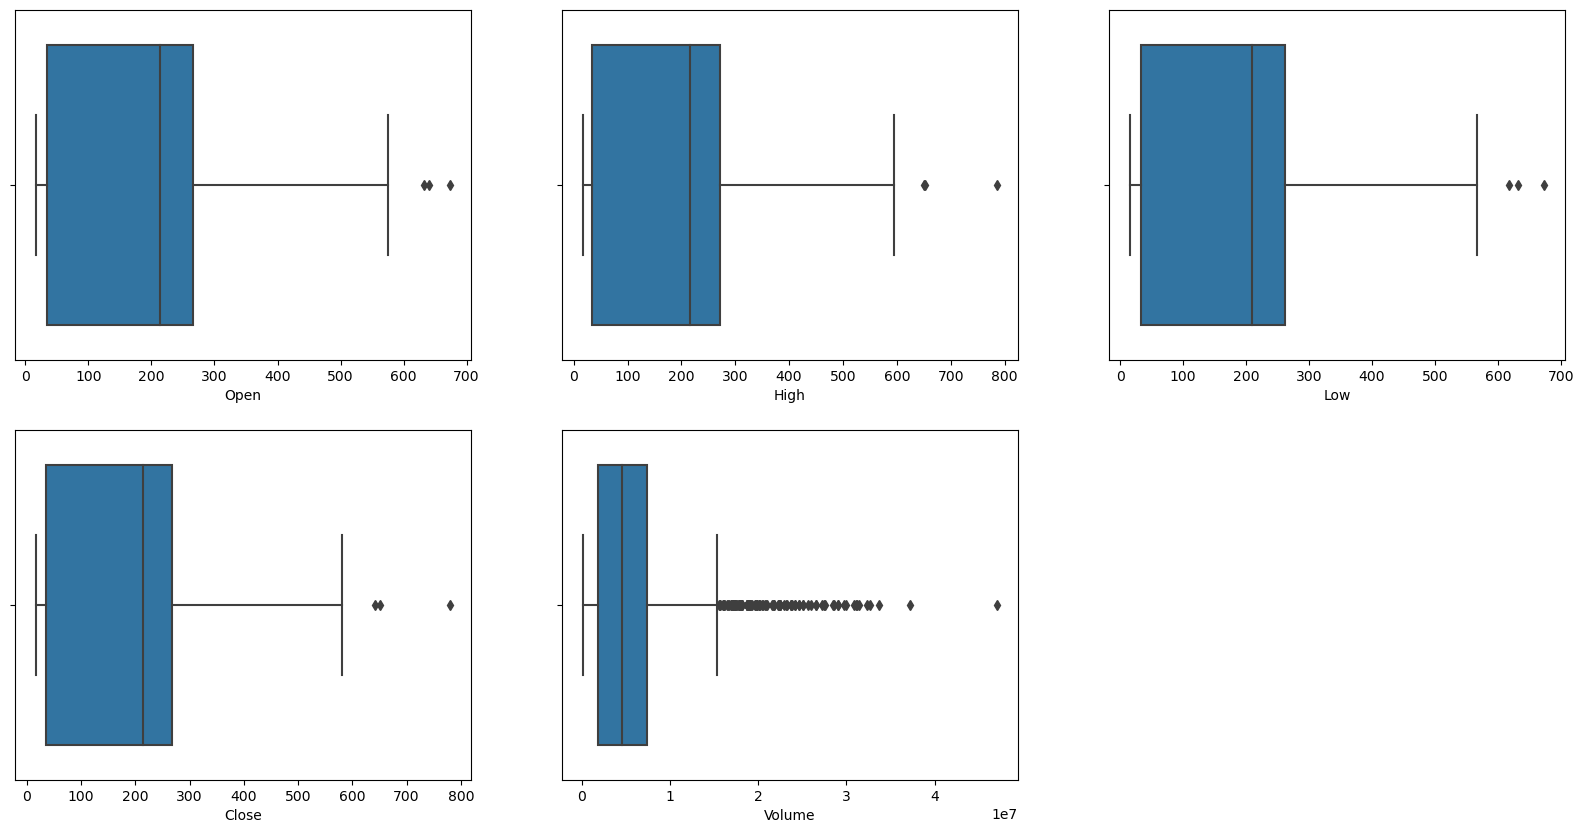

In [14]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']

plt.figure(figsize=(20, 10))

for i, col in enumerate(features):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(data=df, x=col)
    
plt.show()

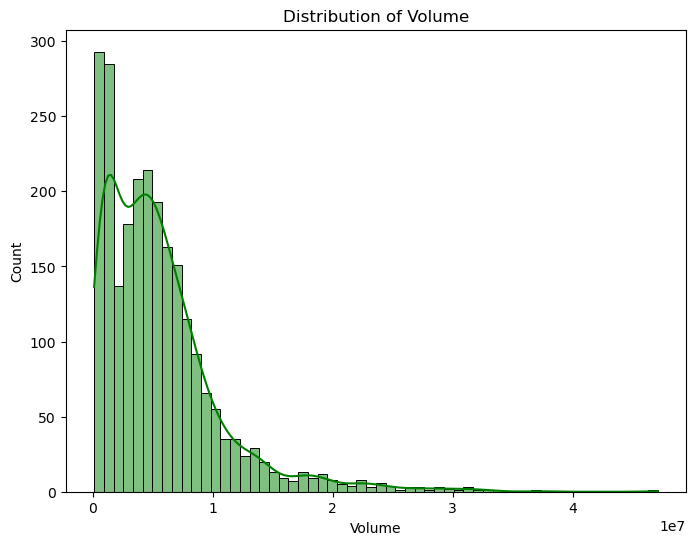

In [15]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Volume'], kde=True, color='g')
plt.xlabel('Volume')
plt.title('Distribution of Volume')
plt.show()

C:\Users\Adimin\AppData\Local\Temp\ipykernel_13264\1703484852.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


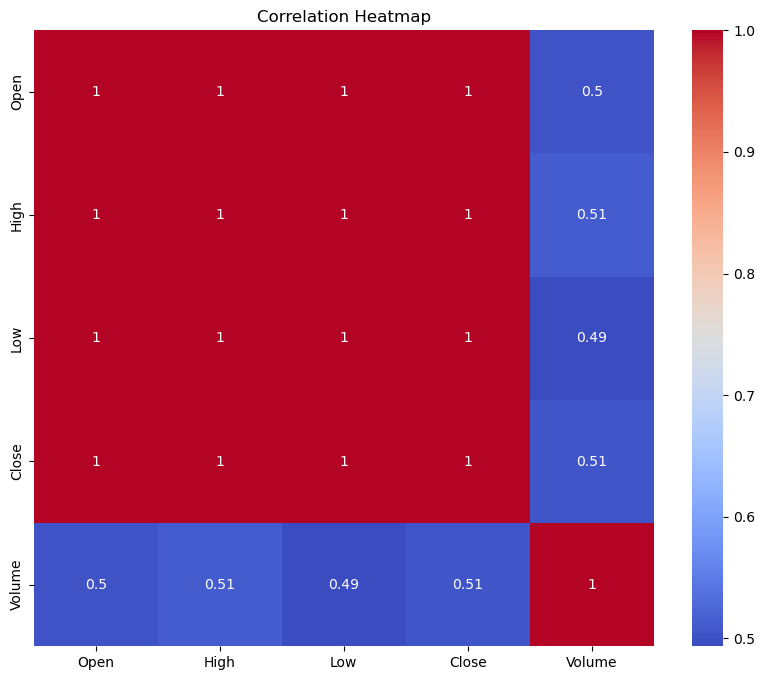

In [16]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

C:\Users\Adimin\AppData\Local\Temp\ipykernel_13264\755202520.py:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr() > 0.9, annot=True, cbar=False)


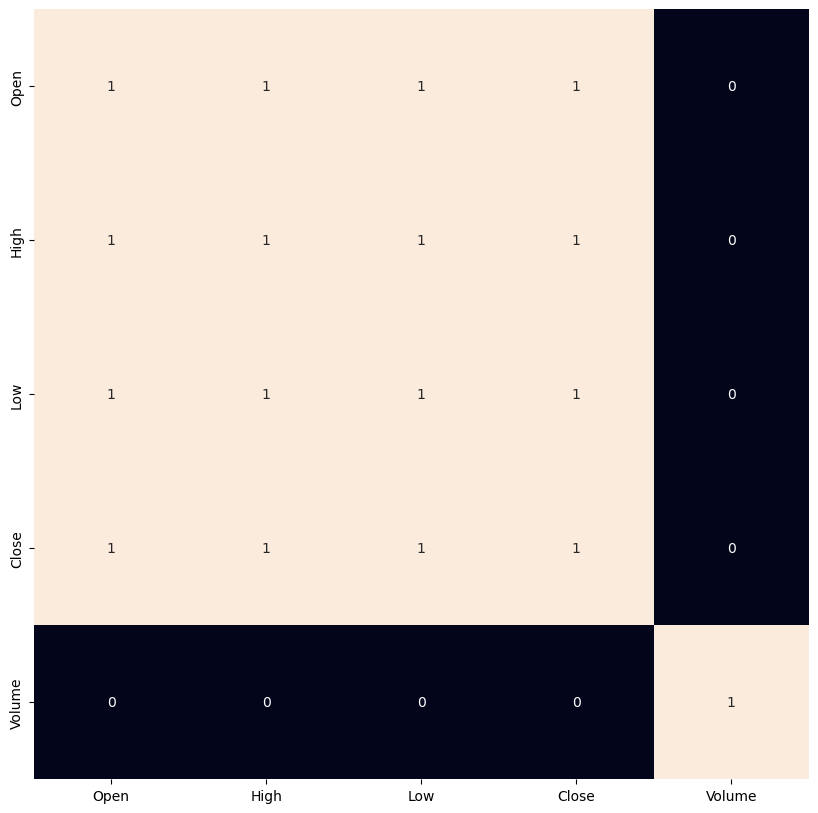

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 10))

# As our concern is with the highly
# correlated features only so, we will visualize
# our heatmap as per that criteria only.
sns.heatmap(df.corr() > 0.9, annot=True, cbar=False)
plt.show()


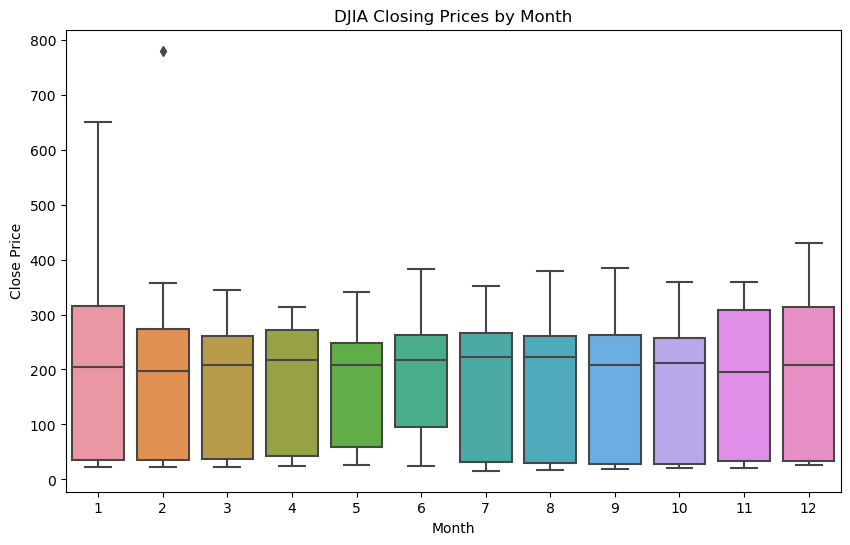

In [20]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Month', y='Close')
plt.title('DJIA Closing Prices by Month')
plt.xlabel('Month')
plt.ylabel('Close Price')
plt.show()

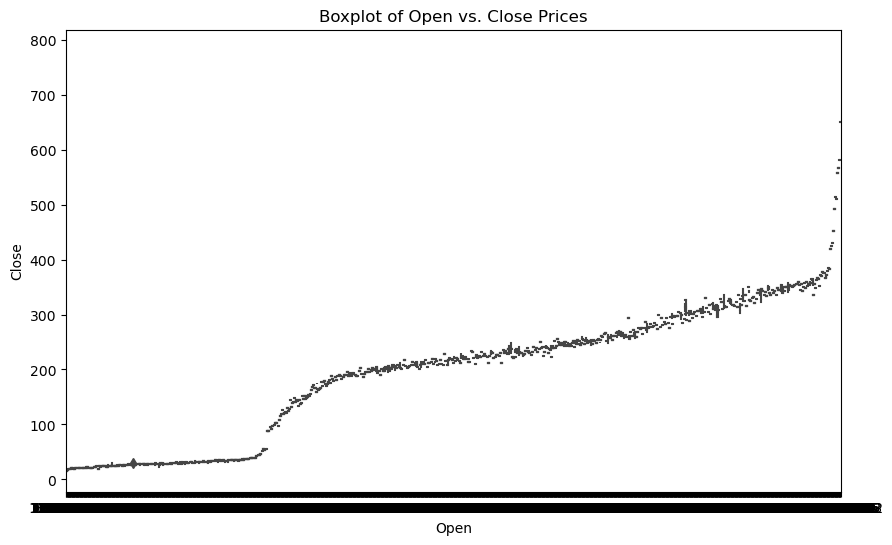

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Open'], y=df['Close'])
plt.title('Boxplot of Open vs. Close Prices')

plt.show()

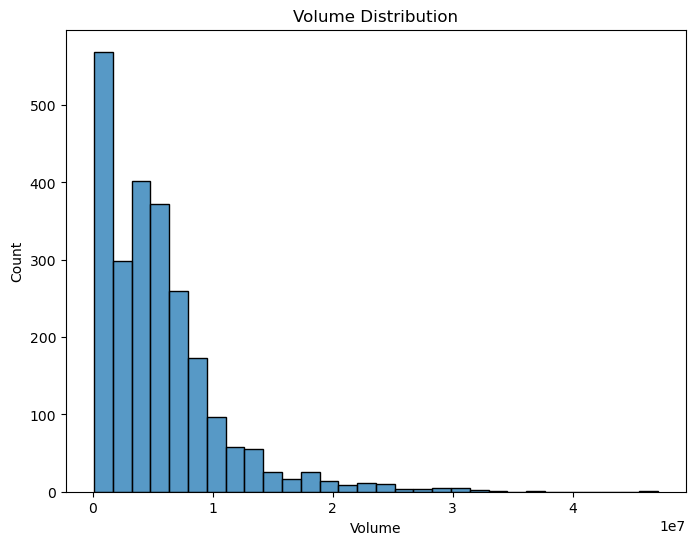

In [23]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Volume'], bins=30)
plt.title('Volume Distribution')
plt.show()